<a href="https://colab.research.google.com/github/WesleySouza13/ESTUDOS/blob/main/Dados_de_vendas_de_ve%C3%ADculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/car_prices.csv')

In [ ]:
display(df)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79947,2012,Hyundai,Veloster,Base,Hatchback,automatic,kmhtc6ad2cu037410,fl,43.0,33267.0,blue,gray,hyundai motor finance,11850,12100,Tue Jan 06 2015 01:30:00 GMT-0800 (PST)
79948,2012,Infiniti,G Sedan,G25,G Sedan,automatic,jn1dv6ap5cm810600,fl,41.0,37855.0,white,black,nissan infiniti lt,17000,18400,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
79949,2012,Infiniti,M,M37,Sedan,automatic,jn1by1ap7cm331807,fl,48.0,45475.0,black,black,nissan infiniti lt,24300,25000,Tue Jan 06 2015 13:00:00 GMT-0800 (PST)
79950,2012,Infiniti,G Sedan,G37 Journey,G Sedan,automatic,jn1cv6ap1cm936352,tx,37.0,29499.0,gray,black,nissan infiniti lt,21400,22400,Wed Jan 07 2015 10:30:00 GMT-0800 (PST)


In [ ]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

#tratamentos de dados
vamos tratar os dados nulos que precisamos para analise de tendencias: marca do carro(make), modelo(model), se o carro é sedan hatch ou SUV (body), trasmissao(transmission) e cor (color)

In [ ]:
enulo = df.isnull().sum()
enulo.head(100)

year                0
make              329
model             347
trim              561
body             2318
transmission     9796
vin                 0
state               0
condition       11792
odometer           75
color             168
interior          168
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [ ]:
#subistituir dados faltantes


In [ ]:
df['make'].fillna('MARCA NÃO INFORMADA',inplace = True)
df['model'].fillna('NAO INFORMADO',inplace = True)
df['body'].fillna('NAO INFORMADO',inplace = True)
df['transmission'].fillna('NAO INFORMADO',inplace = True)
df['color'].fillna('NAO INFORMADO',inplace = True)
df.head().isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

#ANALISE DE DADOS
depois de fazer as limpezas, vamos trabalhar com os parametros que precisamos para criar analises e identificar tendencias na compra de carros

In [ ]:
#VAMOS PRIMEIRO IDENTIFICAR QUAIS MARCAS (MAKE) VENDEM MAIS pelo valor (sellingprice), VAMOS APLICAR UM GROUPBY() PARA AGRUPAR A MARCA PELAS  VENDAS


In [ ]:
graf1 = df.groupby('make')
#AGRUPAMOS OOS DADOS EM SUBDATAS FRAMES
graf1 = df.groupby('make').count().sellingprice.sort_values(ascending = False)#agrupamos para a quantidade de vendas das marcas pelos valores
display(graf1)


make
Ford          12610
Chevrolet      8605
Nissan         7011
Toyota         5472
Dodge          4431
              ...  
mazda tk          1
dodge tk          1
dot               1
ford tk           1
chev truck        1
Name: sellingprice, Length: 94, dtype: int64

Text(0.5, 1.0, 'vendas por montadora')

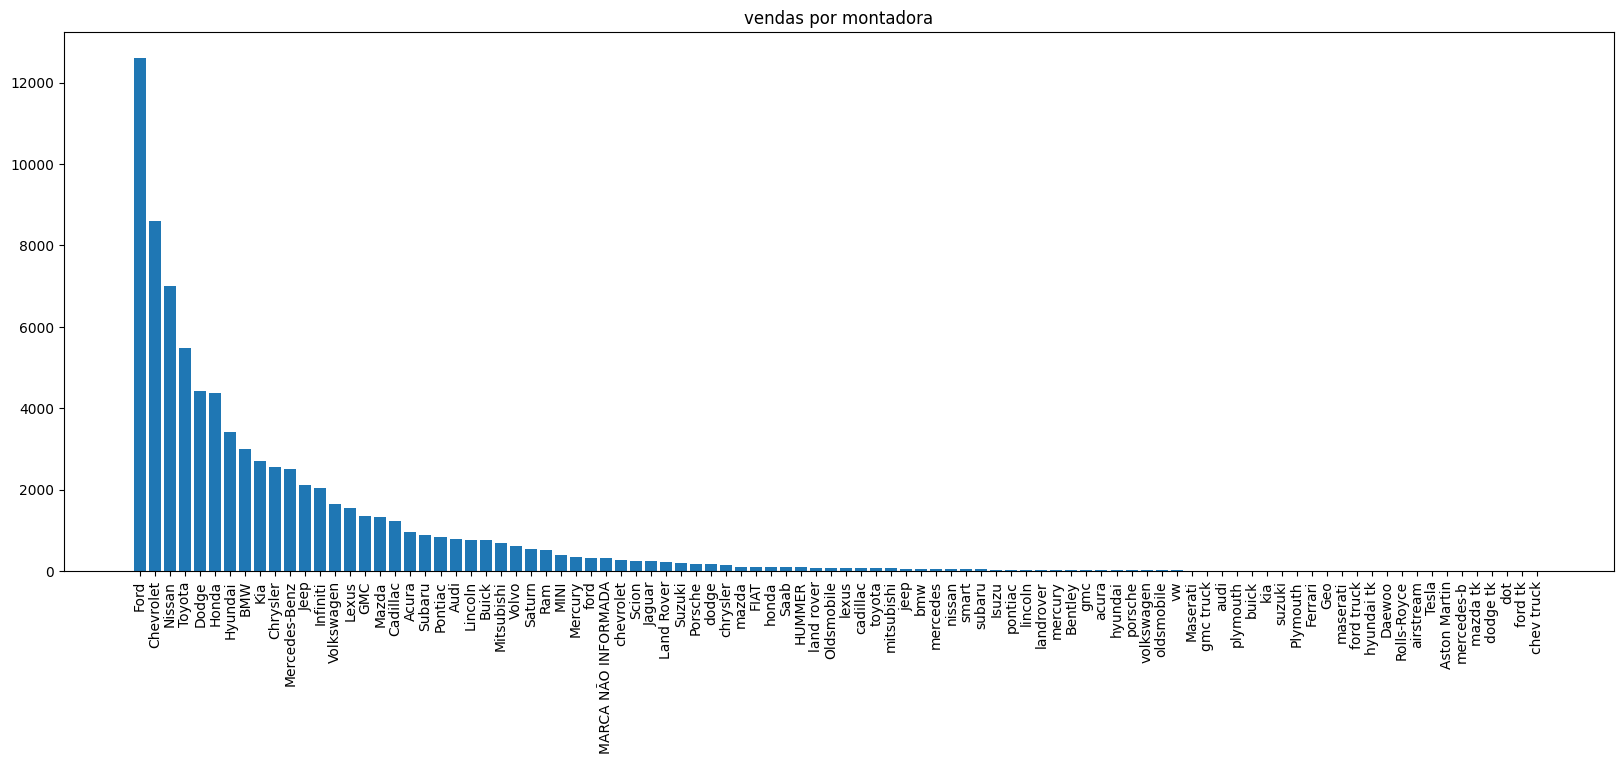

In [ ]:
#identificamos que a ford vende mais, podemos plotar dentro de uma nova variavel para vizualizarmos um novo grafico
plt.figure(figsize = (20,7))
plt.bar(graf1.index,graf1.values)
plt.xticks(rotation = 90)
plt.title('vendas por montadora')

In [ ]:
#modelo de carro que mais se destaca pelo estado onde vende
graf2 = df.groupby('state')
graf2 = df.groupby('state').count().model.sort_values(ascending = False)
display(graf2)



state
ca    13615
fl    10500
pa     6360
tx     6144
ga     4406
il     3398
oh     3255
nc     3242
nj     3147
nv     2593
mi     2380
va     2244
tn     2164
mo     1851
az     1669
md     1551
mn     1437
ny     1426
wi     1410
wa      937
co      906
ne      781
ma      738
in      710
sc      664
pr      549
la      494
on      459
hi      241
ut      233
qc      164
or      147
ab      108
ok       23
ms        4
nm        2
Name: model, dtype: int64

Text(0.5, 1.0, 'estado que mais vendem carros')

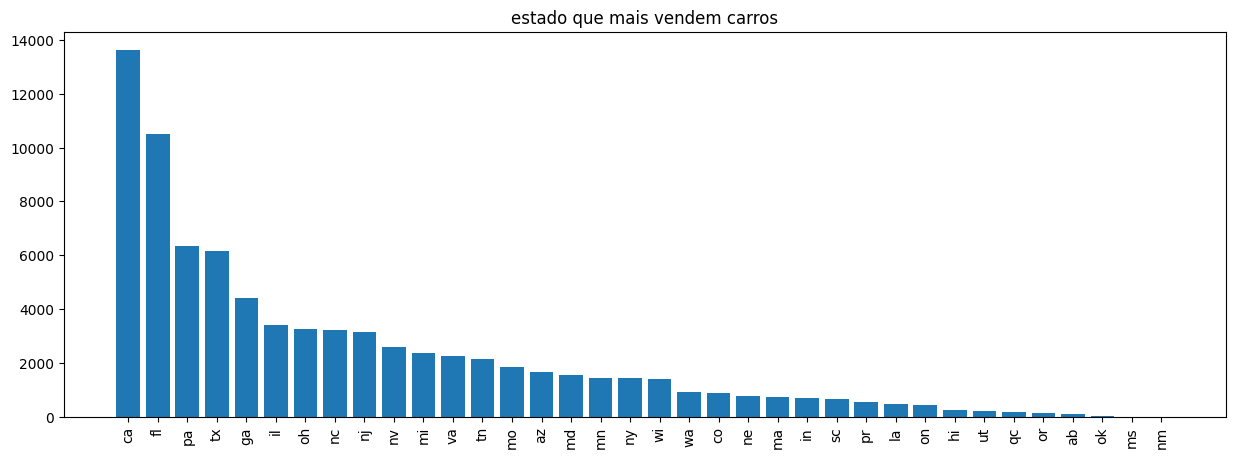

In [ ]:
#vamos criar um grafico para a variavel graf2
plt.figure(figsize = (15,5))
plt.bar(graf2.index,graf2.values)
plt.xticks(rotation = 90)
plt.title('estado que mais vendem carros')


In [ ]:
#estados que mais vendem receita
graf3 = df.groupby('state')
graf3 = df.groupby('state').count().sellingprice.sort_values(ascending = False)

Text(0.5, 1.0, 'ESTADOS QUE MAIS GERAM RECEITA')

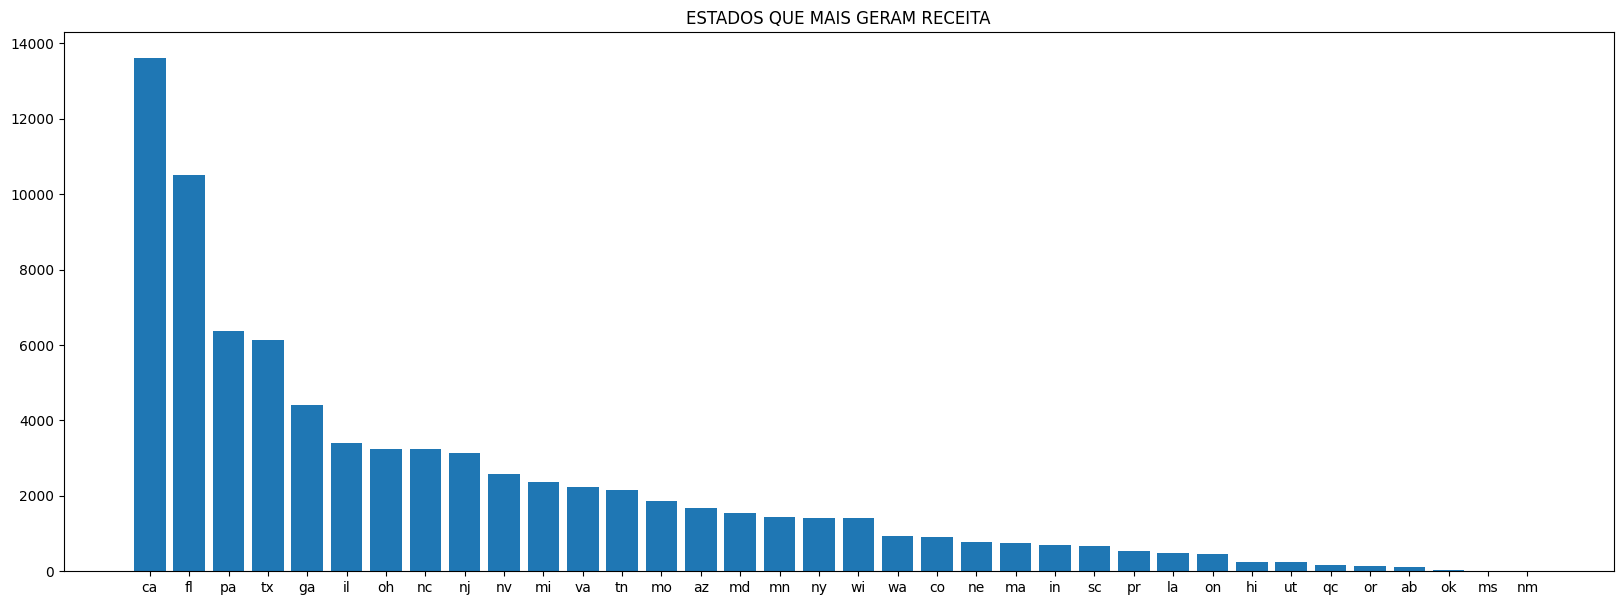

In [ ]:
#GERAR GRAFICO
plt.figure(figsize = (20,7))
plt.bar(graf3.index, graf3.values)
plt.title('ESTADOS QUE MAIS GERAM RECEITA')

In [ ]:
#vamos criar um grafico que mostrara o tipo de transmissao que mais vendem
graf4 = df.groupby('transmission')
graf4 = df.groupby('transmission').count()
display(graf4)


In [ ]:
#contar a quantidade de cada tipo de transmissao
contagem = df['transmission'].value_counts()

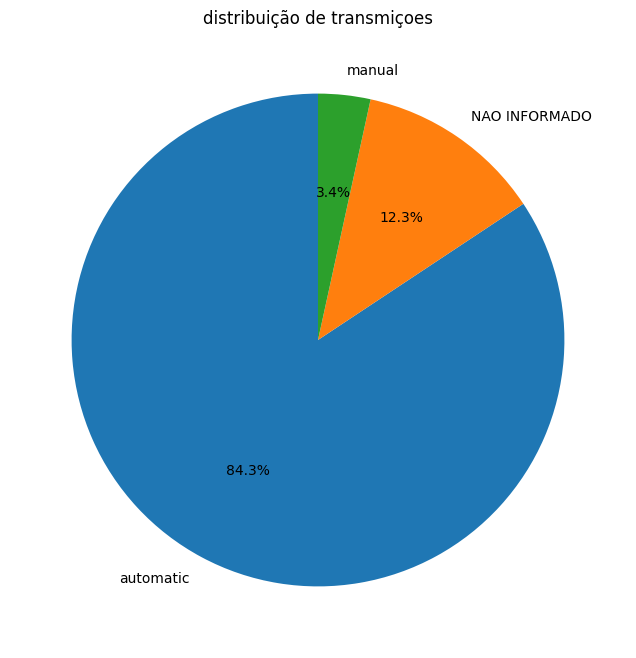

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(contagem, labels = contagem.index, autopct = '%1.1f%%', startangle=90)
plt.title('distribuição de transmiçoes')
plt.show()

#relação cor/compra


> Bloco com recuo
combinaçao cor/venda


In [ ]:
graf5 = d

NameError: name 'dataframe' is not defined